In [1]:
import pandas as pd
import numpy as my
from matplotlib import pyplot as plt
import seaborn as sns

## Data Cleaning

In [2]:
# read in all listings csv
df = pd.read_csv('./datasets/nairobi_all_listings.csv')

In [3]:
df.shape

(4000, 10)

In [4]:
# checking data types; need to convert beds, baths, sq_ft_price, price_KES to numeric data type
df.dtypes

id               int64
category        object
list_type       object
beds            object
baths           object
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [5]:
# confirming any nulls
df.isnull().sum()

id              0
category        0
list_type       0
beds            0
baths           0
sq_ft_price     0
price_KES       0
district        0
neighborhood    0
street          8
dtype: int64

In [6]:
df.head()

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street
0,3394167,Flat & Apartment,For Rent,2,None,None,120000,Westlands,Brookside,None
1,3399035,Flat & Apartment,For Rent,2,None,77,96000,Ridgeways,None,None
2,3433894,Flat & Apartment,For Rent,2,None,46,70000,Dagoretti North,Valley Arcade,Lavington
3,3433821,Flat & Apartment,For Rent,2,2,None,200000,Westlands,Westlands Area,Kingfisher Nest
4,3433777,Flat & Apartment,For Rent,4,None,None,110000,Westlands,Parklands,1St Parklands


In [7]:
# impute nulls values with 0
df['beds'].replace('None', 0, inplace=True)

In [8]:
# convert beds column to numeric datatype
df["beds"] = pd.to_numeric(df["beds"])

In [9]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths           object
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [10]:
# impute nulls values with 0
df['baths'].replace('None', 0, inplace=True)

In [11]:
# convert baths column to numeric datatype
df["baths"] = pd.to_numeric(df["baths"])

In [12]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths            int64
sq_ft_price     object
price_KES       object
district        object
neighborhood    object
street          object
dtype: object

In [13]:
# impute nulls values with 0
df['sq_ft_price'].replace('None', 0, inplace=True)

In [14]:
# convert sq_ft_price column to numeric datatype 
df["sq_ft_price"] = pd.to_numeric(df["sq_ft_price"])

In [15]:
# impute nulls values with 0
df['price_KES'].replace('None', 0, inplace=True)

In [16]:
# convert price_KES column to numeric datatype 
df["price_KES"] = pd.to_numeric(df["price_KES"])

In [17]:
df.dtypes

id               int64
category        object
list_type       object
beds             int64
baths            int64
sq_ft_price      int64
price_KES        int64
district        object
neighborhood    object
street          object
dtype: object

In [18]:
# create new column to convert KES price to USD
# conversion rate from extraction date May 8, 2020
df['price_USD'] = df['price_KES'] / 106.06

In [19]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street,price_USD
0,3394167,Flat & Apartment,For Rent,2,0,0,120000,Westlands,Brookside,None,1131.435037
1,3399035,Flat & Apartment,For Rent,2,0,77,96000,Ridgeways,None,None,905.148029
2,3433894,Flat & Apartment,For Rent,2,0,46,70000,Dagoretti North,Valley Arcade,Lavington,660.003771


In [20]:
# create new column to convert KES sq_ft_price to USD
# conversion rate from extraction date May 8, 2020
df['sq_ft_price_USD'] = df['sq_ft_price'] / 106.06

In [21]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,price_KES,district,neighborhood,street,price_USD,sq_ft_price_USD
0,3394167,Flat & Apartment,For Rent,2,0,0,120000,Westlands,Brookside,None,1131.435037,0.000000
1,3399035,Flat & Apartment,For Rent,2,0,77,96000,Ridgeways,None,None,905.148029,0.726004
2,3433894,Flat & Apartment,For Rent,2,0,46,70000,Dagoretti North,Valley Arcade,Lavington,660.003771,0.433717


In [22]:
# reorder columns 
df[['id', 'category', 'list_type', 'beds', 'baths', 
    'sq_ft_price', 'sq_ft_price_USD', 'price_KES', 'price_USD',
    'district', 'neighborhood', 'street']]

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington
3,3433821,Flat & Apartment,For Rent,2,2,0,0.000000,200000,1885.725061,Westlands,Westlands Area,Kingfisher Nest
4,3433777,Flat & Apartment,For Rent,4,0,0,0.000000,110000,1037.148784,Westlands,Parklands,1St Parklands
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3400085,Flat & Apartment,For Sale,3,4,11476,108.202904,18900000,178201.018292,Dagoretti North,Kileleshwa,Kileleshwa
3996,3403249,Flat & Apartment,For Sale,3,0,0,0.000000,19000000,179143.880822,Dagoretti North,Kilimani,None
3997,3400575,Studio,For Sale,1,1,8361,78.832736,3600000,33943.051103,Dagoretti North,Kileleshwa,Kileleshwa
3998,3386205,Flat & Apartment,For Sale,2,2,0,0.000000,7950000,74957.571186,Ngong Road,None,None


In [23]:
# save changes made to csv
df.to_csv('./datasets/nairobi_all_listings')

## Exploratory Data Analysis

### Rental Data

In [24]:
# import cleaned csv of locations
df = pd.read_csv('./datasets/nairobi_all_listings_clean.csv')

In [25]:
df.head(3)

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None,WESTLANDS,SPRING VALLEY,-1.256163,36.791940
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None,WESTLANDS,MUTHAIGA,-1.230687,36.849247
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington,WESTLANDS,MAZIWA,-1.290723,36.769157


In [26]:
df_rent= df[(df.list_type == 'For Rent')]

In [27]:
df_rent

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
0,3394167,Flat & Apartment,For Rent,2,0,0,0.000000,120000,1131.435037,Westlands,Brookside,None,WESTLANDS,SPRING VALLEY,-1.256163,36.791940
1,3399035,Flat & Apartment,For Rent,2,0,77,0.726004,96000,905.148029,Ridgeways,None,None,WESTLANDS,MUTHAIGA,-1.230687,36.849247
2,3433894,Flat & Apartment,For Rent,2,0,46,0.433717,70000,660.003771,Dagoretti North,Valley Arcade,Lavington,WESTLANDS,MAZIWA,-1.290723,36.769157
3,3433821,Flat & Apartment,For Rent,2,2,0,0.000000,200000,1885.725061,Westlands,Westlands Area,Kingfisher Nest,WESTLANDS,SPRING VALLEY,-1.258453,36.804754
4,3433777,Flat & Apartment,For Rent,4,0,0,0.000000,110000,1037.148784,Westlands,Parklands,1St Parklands,WESTLANDS,MUTHAIGA,-1.263270,36.815948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,3425932,Flat & Apartment,For Rent,3,3,72,0.678861,140000,1320.007543,Westlands,Westlands Area,Cedar Road,WESTLANDS,MUTHANGARI,-1.267686,36.797797
1777,3430185,Flat & Apartment,For Rent,3,4,0,0.000000,120000,1131.435037,Dagoretti North,Kilimani,NaN,WESTLANDS,KILIMANI,-1.289279,36.786931
1778,3429123,Flat & Apartment,For Rent,1,2,85,0.801433,110000,1037.148784,Dagoretti North,Lavington,Gitanga Road,WESTLANDS,MAZIWA,-1.289890,36.768148
1779,3429516,Flat & Apartment,For Rent,3,4,0,0.000000,100000,942.862531,Dagoretti North,Kileleshwa,None,WESTLANDS,KILELESHWA,-1.280739,36.781686


In [28]:
df_rent['County'].value_counts()

WESTLANDS    1691
LANG'ATA       35
KASARANI       27
STAREHE        13
KIBRA           7
DAGORETTI       4
EMBAKASI        3
KAMUKUNJI       1
Name: County, dtype: int64

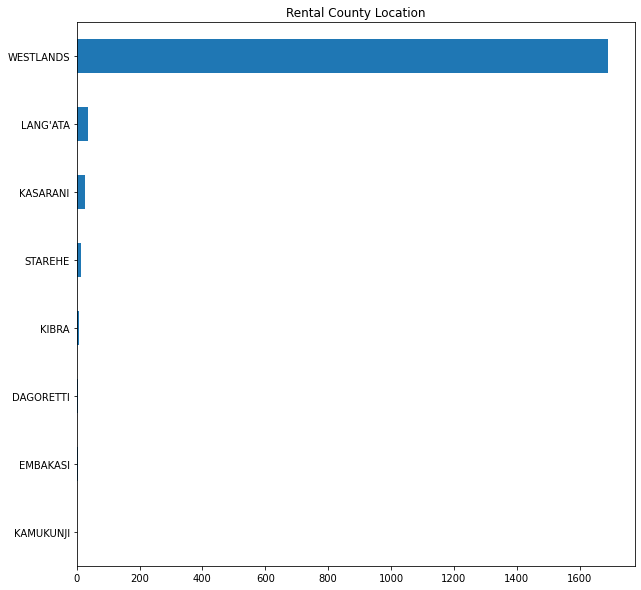

In [29]:
# created bar chart to visualize county locations
df_rent['County'].value_counts(ascending=True).plot(figsize= (10,10), fontsize=10,
            title= 'Rental County Location',
            legend=None, 
            kind='barh')

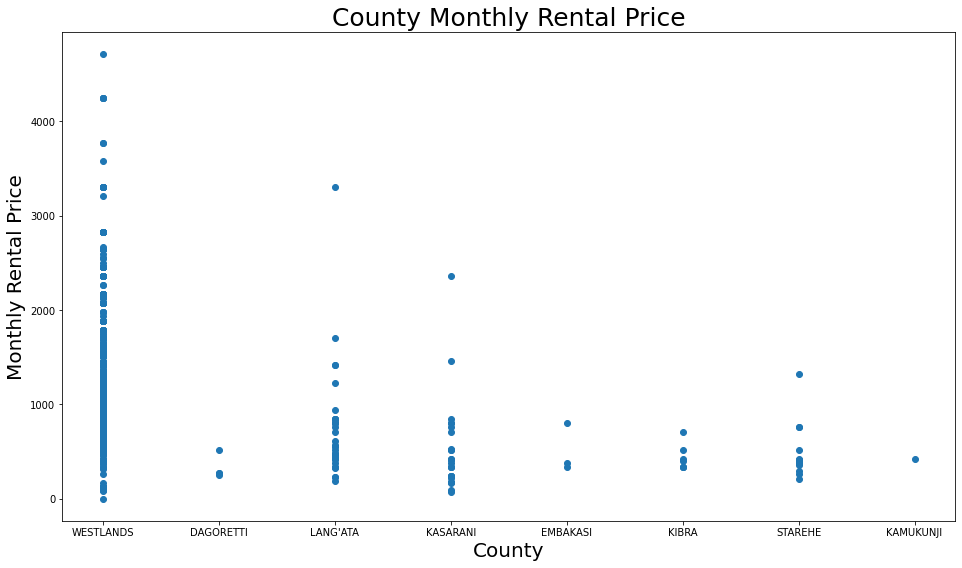

In [30]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of SubCounty location and price.
plt.scatter(df_rent['County'],
            df_rent['price_USD']);

plt.title("County Monthly Rental Price", fontsize= 25)
plt.ylabel("Monthly Rental Price", fontsize = 20)
plt.xlabel("County", fontsize = 20);

In [31]:
df_rent['SubCounty'].value_counts()

KILIMANI           435
MUTHANGARI         296
MUTHAIGA           224
KILELESHWA         171
SPRING VALLEY      159
LAVINGTON          115
KITISURU            71
MAZIWA              66
LORESHO             61
MT VIEW             48
HIGHRIDGE           43
KAREN               25
SOUTH B              9
ROYSAMBU             7
GARDEN ESTATE        6
NAIROBI WEST         5
KAHAWA WEST          5
KASARANI             4
JAMHURI              4
LANG'ATA             3
KIBERA               2
IMARA DAIMA          2
RIRUTA               2
SOUTH C              2
MWIKI                1
CLAY CITY            1
GITHURAI             1
UTHIRU               1
KARURA               1
GOLF COURSE          1
EMBAKASI             1
CITY CENTRE          1
NGARA EAST           1
PANGANI              1
KAWANGWARE           1
NYAYO                1
BURUBURU             1
CITY SQUARE          1
KANGEMI CENTRAL      1
RUARAKA              1
Name: SubCounty, dtype: int64

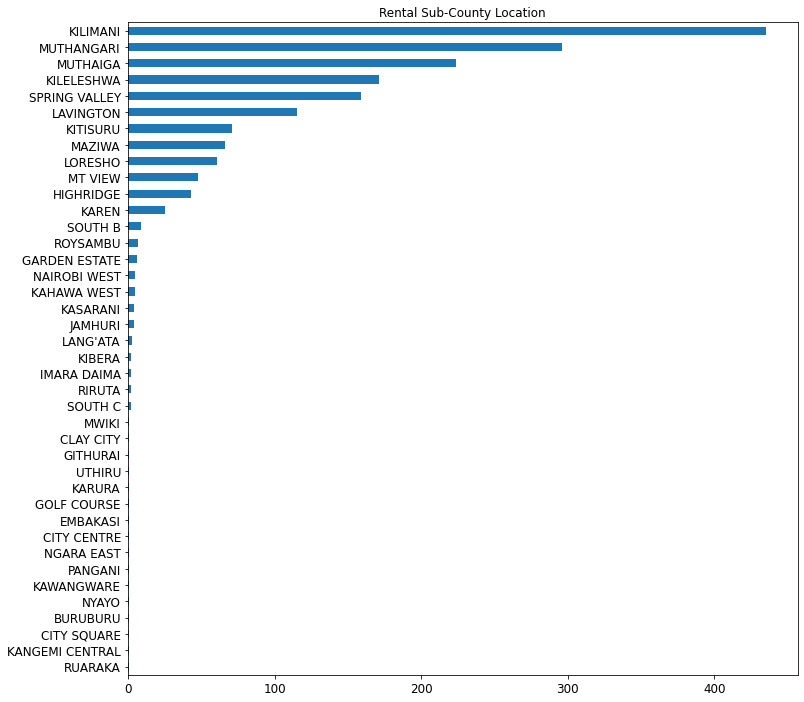

In [32]:
# created bar chart to visualize Sub-County locations
df_rent['SubCounty'].value_counts(ascending=True).plot(figsize= (12,12), fontsize=12,
            title= 'Rental Sub-County Location',
            legend=None, 
            kind='barh')

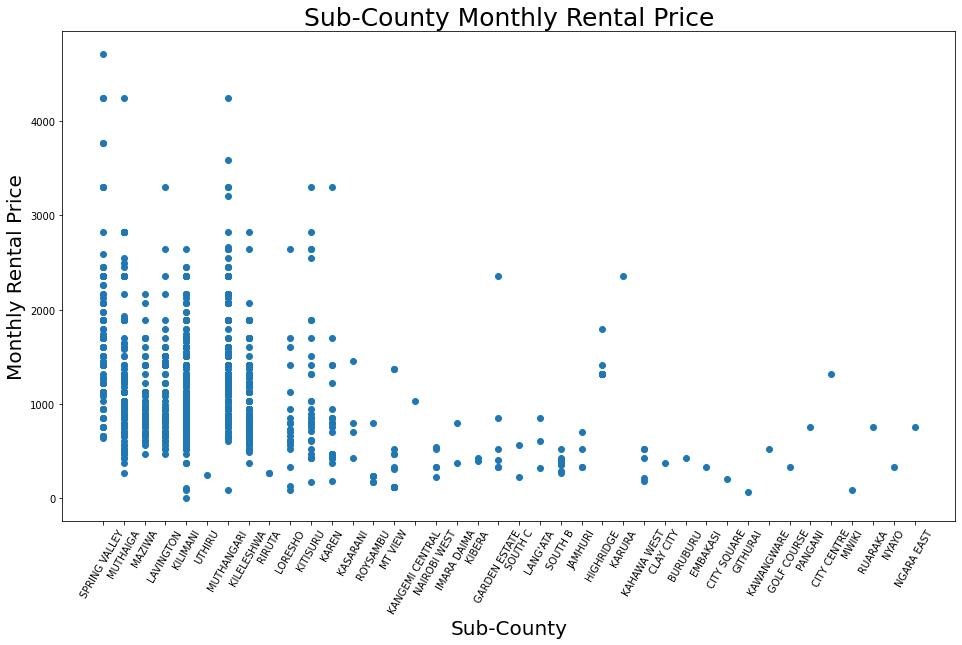

In [33]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of SubCounty location and price.
plt.scatter(df_rent['SubCounty'],
            df_rent['price_USD']);

plt.title("Sub-County Monthly Rental Price", fontsize= 25)
plt.ylabel("Monthly Rental Price", fontsize = 20)
plt.xticks(rotation=60)
plt.xlabel("Sub-County", fontsize = 20);

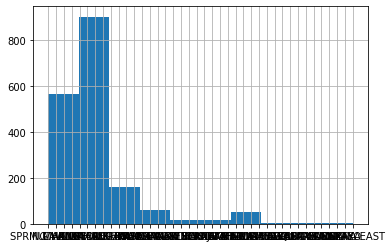

In [34]:
df_rent['SubCounty'].hist()

Extracted rental data was spread across 8 county location - Westlands, Dagoretti, Lang'ata, Kasarani, Embakasi, Kibra, Starehe, Kamukunji with the large majority of the advertisement location data scraped was in Westlands county (95% of extracted data). In looking at the monthly rental price within each county there is a wide range in monthly rental price for Westlands, Lang'ata and Kasarani. At the sub-county level there is also a wide range in rental prices across sib-counties with a right skew distribution in rental prices.

### Sale Data

In [35]:
df_sale = df[(df.list_type == 'For Sale')]

In [36]:
df_sale.head()

,id,category,list_type,beds,baths,sq_ft_price,sq_ft_price_USD,price_KES,price_USD,district,neighborhood,street,County,SubCounty,Latitude,Longitude
1781,3428432,Flat & Apartment,For Sale,3,2,0,0.000000,18000000,169715.25550,Dagoretti North,Kileleshwa,Hamisi Road,WESTLANDS,KILELESHWA,-1.280739,36.781686
1782,3433663,Studio,For Sale,1,1,0,0.000000,2000000,18857.25061,Dagoretti North,Naivasha Road,None,WESTLANDS,MT VIEW,-1.272926,36.731603
1783,3433810,Flat & Apartment,For Sale,3,4,7548,71.167264,13000000,122572.12900,Dagoretti North,Kilimani,Kilungu Road,WESTLANDS,KILIMANI,-1.294029,36.777502
1784,3433808,Studio,For Sale,1,1,10839,102.196870,3500000,33000.18857,Dagoretti North,Kilimani,Dennis Pritt,WESTLANDS,KILIMANI,-1.285543,36.788115
1785,3433877,Flat & Apartment,For Sale,3,3,0,0.000000,15500000,146143.69220,Westlands,Parklands,None,WESTLANDS,MUTHAIGA,-1.259882,36.817892


In [37]:
df_sale['County'].value_counts()

WESTLANDS    1655
KASARANI       41
STAREHE        32
LANG'ATA       32
KIBRA          24
EMBAKASI       16
DAGORETTI      12
KAMUKUNJI       7
Name: County, dtype: int64

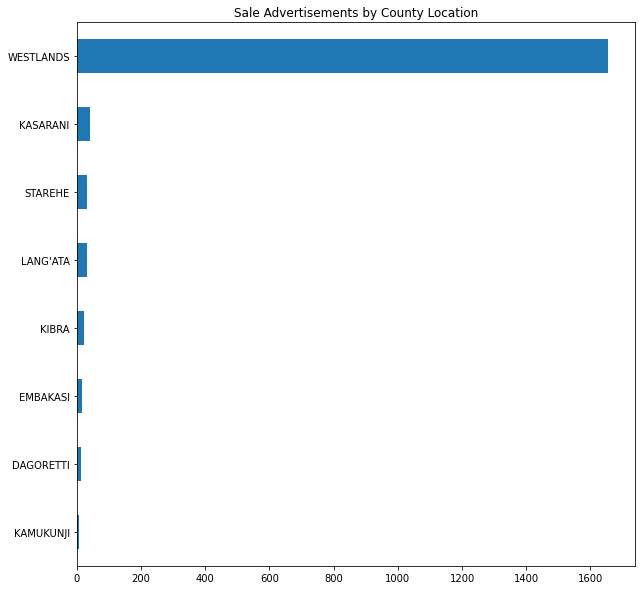

In [38]:
# created bar chart to visualize county locations
df_sale['County'].value_counts(ascending=True).plot(figsize= (10,10), fontsize=10,
            title= 'Sale Advertisements by County Location',
            legend=None, 
            kind='barh')

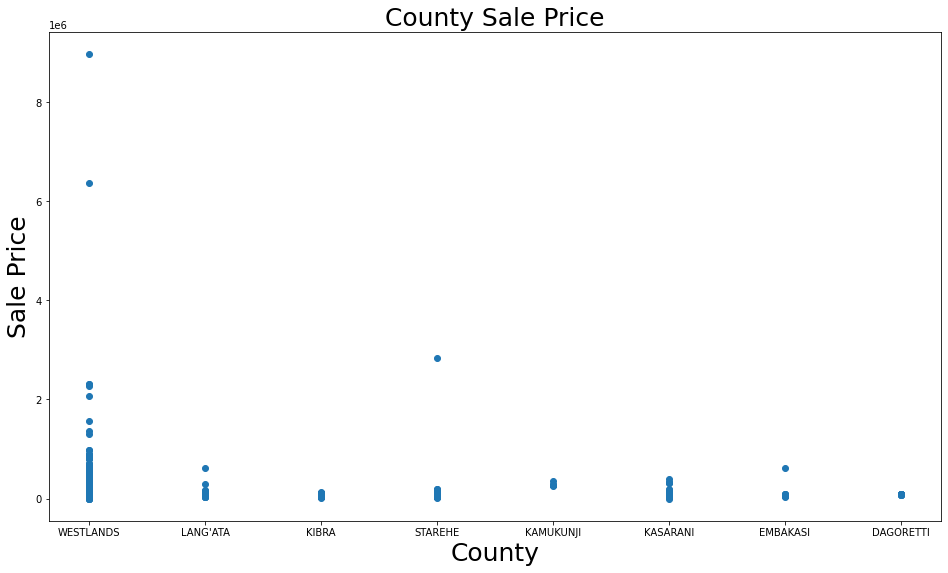

In [39]:
# set figure size
plt.figure(figsize=(16, 9))

# create scatterplot of County location and price.
plt.scatter(df_sale['County'],
            df_sale['price_USD']);

plt.title("County Sale Price", fontsize= 25)
plt.ylabel("Sale Price", fontsize = 25)
plt.xlabel("County", fontsize = 25);

In [40]:
df_sale['SubCounty'].value_counts()

KILIMANI           699
KILELESHWA         355
LAVINGTON          160
MUTHAIGA           115
MUTHANGARI         103
SPRING VALLEY       84
MAZIWA              83
KITISURU            31
JAMHURI             15
MT VIEW             14
KASARANI            14
IMARA DAIMA         13
KAHAWA WEST         13
SOUTH C             13
SOUTH B             12
PANGANI             10
LORESHO              9
RIRUTA               9
KIBERA               9
LANG'ATA             9
NGARA EAST           8
NAIROBI WEST         6
BURUBURU             6
CLAY CITY            5
GARDEN ESTATE        4
NYAYO                3
UTHIRU               3
KANGEMI CENTRAL      2
KAREN                2
DONHOLM              2
RUARAKA              1
CALIFORNIA           1
CITY SQUARE          1
CITY CENTRE          1
HIGHRIDGE            1
UTAWALA              1
GITHURAI             1
HARDY                1
Name: SubCounty, dtype: int64

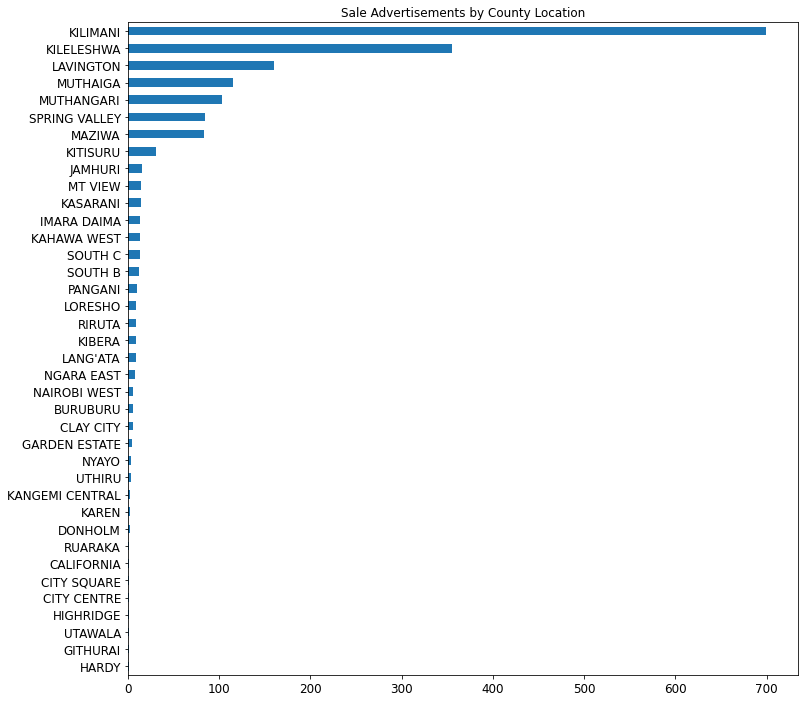

In [41]:
# created bar chart to visualize Sub-County locations
df_sale['SubCounty'].value_counts(ascending=True).plot(figsize= (12,12), fontsize=12,
            title= 'Sale Advertisements by County Location',
            legend=None, 
            kind='barh')

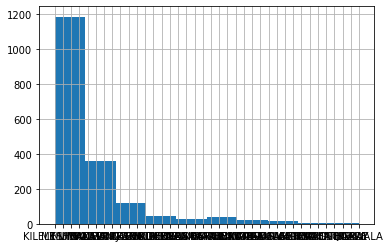

In [42]:
df_sale['SubCounty'].hist()

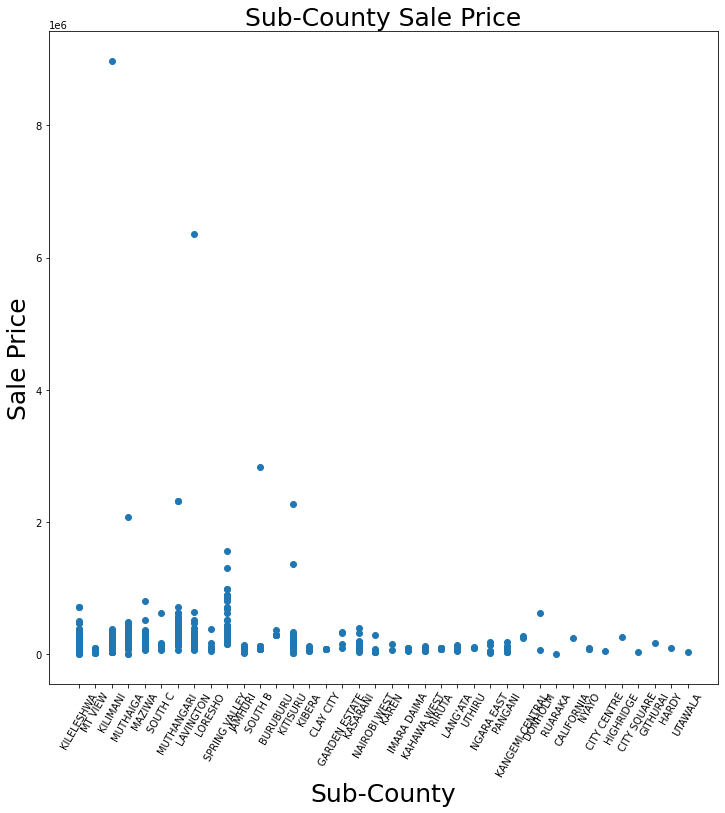

In [43]:
# set figure size
plt.figure(figsize=(12, 12))

# create scatterplot of County location and price.
plt.scatter(df_sale['SubCounty'],
            df_sale['price_USD']);

plt.title("Sub-County Sale Price", fontsize= 25)
plt.ylabel("Sale Price", fontsize = 25)
plt.xticks(rotation=60)
plt.xlabel("Sub-County", fontsize = 25);

Extracted real estate sale data was spread across 8 counties 39 sub-county locations In Nairobi City. Similar to rental data, Westlands county dominated the advert locations for sale properties. In terms of sub-county data, the large portion of the advertisement locations scraped were in Kilimani and Keleleshwa sub-county (37% and 20%). In looking at the sub-county level sale price data, there is a wide range in sale prices due to a outlier in prices which is highlighted in Muthaiga, Muthangari and Jamhuri sub-counties.